<div style='text-align'></div>

<div style="text-align:right;">NN with Tensorboard for Classification</div>
<div style="text-align:right;">Brickea with material from mofan python</div>

# Neural Network with Tensorboard for Classification Problem

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Instructions for updating:
non-resource variables are not supported in the long term


## Data

In [81]:
# MNIST 数据 
mnist = tf.keras.datasets.mnist
(train_x,train_y),(test_x,test_y) = mnist.load_data()

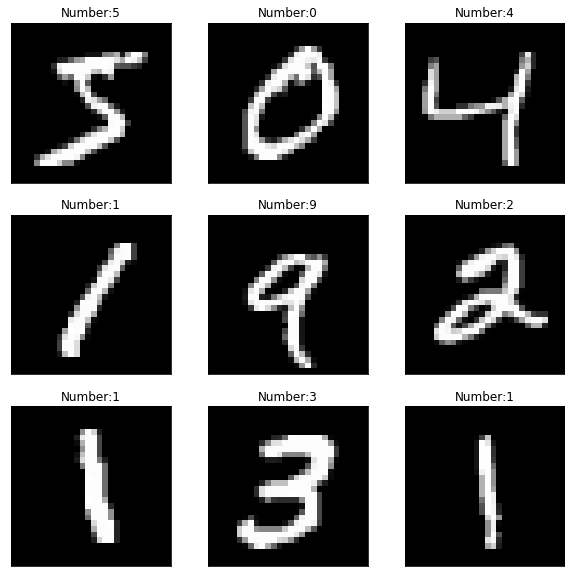

In [82]:
fig = plt.figure(figsize=[10,10])
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(train_x[i],cmap='gray')
    plt.title(('Number:%d'%(train_y[i])))
    plt.xticks([])
    plt.yticks([])

In [83]:
# one hot code
(train_x,test_x) = (train_x.reshape(train_x.shape[0],train_x.shape[1]*train_x.shape[2]),test_x.reshape(test_x.shape[0],test_x.shape[1]*test_x.shape[2]))

In [84]:
train_x.shape

(60000, 784)

In [85]:
train_x.astype(np.float32)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [86]:
train_y = (train_y[:,np.newaxis])

## Create the NN

In [87]:
def add_layer(inputs,in_size,out_size,layer,activation_function=None):
    layer_name = 'layer' + layer
    with tf.name_scope(layer_name):
        with tf.name_scope('Weights'):
            Weights = tf.Variable(tf.random.normal([in_size,out_size]),name = 'W')
            tf.summary.histogram(layer_name+'/Weights',Weights)
        with tf.name_scope('biases'):
            biases = tf.Variable(tf.zeros([1,out_size]) + 0.1,name = 'b')
            tf.summary.histogram(layer_name+'/biases',biases)
        with tf.name_scope('Wx_plus_bias'):
            Wx_plus_bias = tf.add(tf.matmul(inputs,Weights),biases)
        outputs = Wx_plus_bias
        if activation_function is not None:
            outputs = activation_function(Wx_plus_bias)
        tf.summary.histogram(layer_name+'/outputs',outputs)
    return outputs

In [88]:
x_input = tf.placeholder(tf.float32,[None,784])
y_output = tf.placeholder(tf.float32,[None,1])

In [89]:
prediction = add_layer(x_input,784,10,'Classification',activation_function=tf.nn.softmax)

## Cross entropy loss 

loss函数（即最优化目标函数）选用交叉熵函数。交叉熵用来衡量预测值和真实值的相似程度，如果完全相同，它们的交叉熵等于零。

In [90]:
with tf.name_scope('loss'):
#     loss = tf.reduce_mean(tf.reduce_sum(tf.square(prediction - y_output),reduction_indices=[1]))
    cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_output * tf.log(prediction),reduction_indices=[1]))
    tf.summary.scalar('cross_entropy_loss',cross_entropy_loss)

train方法（最优化算法）采用梯度下降法。

In [91]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy_loss)

## Train

In [92]:
with tf.Session() as sess:
    merged = tf.summary.merge_all() # tensorflow >= 0.12
    writer = tf.summary.FileWriter("logs/", sess.graph)
    
    sess.run(tf.global_variables_initializer())
    
    for i in range(301):
        sess.run(train_step,feed_dict={x_input:train_x,y_output:train_y})
        if i % 50 ==0:
#             rs = sess.run(merged,feed_dict={x_input:train_x,y_output:train_y})
#             writer.add_summary(rs,i)
            print('loss %f'% sess.run(cross_entropy_loss,feed_dict={x_input:train_x,y_output:train_y}))
        

loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
